<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/FlightPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import io

In [322]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train (3).xlsx


In [323]:
train = pd.read_excel(io.BytesIO(uploaded['Data_Train.xlsx']))
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [324]:
uploaded2 = files.upload()

Saving Test_set.xlsx to Test_set (4).xlsx


In [325]:
test = pd.read_excel(io.BytesIO(uploaded2['Test_set.xlsx']))
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [326]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [327]:
print(train['Airline'].unique())
print(train['Destination'].unique())
print(train['Source'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [328]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [329]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [330]:
##dropping null values

In [331]:
train.dropna(inplace=True)

In [332]:
train.shape

(10682, 11)

In [333]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [334]:


for i in train.columns:
  print(i)
  print(train[i].unique())
  print('\n')

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


Date_of_Journey
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']


Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


Route
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → N

In [335]:
train['Destination'] = train['Destination'].replace('New Delhi','Delhi')
test['Destination'] = test['Destination'].replace('New Delhi','Delhi')

In [336]:
train['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [337]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'])


In [338]:
train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [339]:
train['month']=train['Date_of_Journey'].dt.month_name()
train['year']=train['Date_of_Journey'].dt.year
train['day']=train['Date_of_Journey'].dt.day_name()
train["Date"] = train['Date_of_Journey'].dt.day
train['dayofweek'] = train['Date_of_Journey'].dt.dayofweek  ##monday 0 --- sunday 6

train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year,day,Date,dayofweek
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,2019,Sunday,24,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,January,2019,Saturday,5,5


In [340]:
train['is_weekend'] = 0
for i in range(0,len(train)):
   if (train['dayofweek'][i]==5) | (train['dayofweek'][i]==6):
        train['is_weekend'][i]='Yes'
   else:
        train['is_weekend'][i]='No'

## train['type_of_day']=np.where((train['day']=='Sunday')|(train['day']=='Saturday'), "weekend", "weekday")

KeyError: ignored

In [ ]:
train.head(2)

In [ ]:
test['month']=test['Date_of_Journey'].dt.month_name()
train['year']=test['Date_of_Journey'].dt.year
test['day']=test['Date_of_Journey'].dt.day_name()
test["Date"] = test['Date_of_Journey'].dt.day
test['dayofweek'] = test['Date_of_Journey'].dt.dayofweek  ##monday 0 --- sunday 6

test.head(2)

In [ ]:
test['is_weekend']=np.where((test['day']=='Sunday')|(test['day']=='Saturday'), "Yes", "No")

In [341]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [342]:
duration = list(train["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []

for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
    
train["Duration_minutes"] = dur_minutes
train

train.drop(["Duration"], axis=1, inplace = True)

In [343]:
duration = list(test["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
test["Duration_minutes"] = dur_minutes
test.drop(labels = 'Duration', axis = 1, inplace = True)

In [344]:
# Training Set
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute
train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

# Test Set
test['Depart_Time_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Depart_Time_Minutes'] = pd.to_datetime(test.Dep_Time).dt.minute
test.drop(labels = 'Dep_Time', axis = 1, inplace = True)
test['Arr_Time_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [345]:
train['Depart_Time_Minutes_Final']=train['Depart_Time_Minutes']/60 #converting minutes into hour
train['Depart_Time_Hour_Final']=round(train['Depart_Time_Hour']+train['Depart_Time_Minutes_Final'],2)
train['Depart_Time_Hour_Final']

0        22.33
1         5.83
2         9.42
3        18.08
4        16.83
         ...  
10678    19.92
10679    20.75
10680     8.33
10681    11.50
10682    10.92
Name: Depart_Time_Hour_Final, Length: 10682, dtype: float64

In [346]:
test['Depart_Time_Minutes_Final']=test['Depart_Time_Minutes']/60 #converting minutes into hour
test['Depart_Time_Hour_Final']=round(test['Depart_Time_Hour']+test['Depart_Time_Minutes_Final'],2)
test['Depart_Time_Hour_Final']

0       17.50
1        6.33
2       19.25
3        8.00
4       23.92
        ...  
2666    20.50
2667    14.33
2668    21.83
2669     4.00
2670     4.92
Name: Depart_Time_Hour_Final, Length: 2671, dtype: float64

In [347]:
train['Arr_Time_Minutes_Final']=train['Arr_Time_Minutes']/60 #converting minutes into hour
train['Arr_Time_Hour_Final']=round(train['Arr_Time_Hour']+train['Arr_Time_Minutes_Final'],2)
train['Arr_Time_Hour_Final']

0         1.17
1        13.25
2         4.42
3        23.50
4        21.58
         ...  
10678    22.42
10679    23.33
10680    11.33
10681    14.17
10682    19.25
Name: Arr_Time_Hour_Final, Length: 10682, dtype: float64

In [348]:
test['Arr_Time_Minutes_Final']=test['Arr_Time_Minutes']/60 #converting minutes into hour
test['Arr_Time_Hour_Final']=round(test['Arr_Time_Hour']+test['Arr_Time_Minutes_Final'],2)
test['Arr_Time_Hour_Final']

0        4.42
1       10.33
2       19.00
3       21.00
4        2.75
        ...  
2666    20.42
2667    16.92
2668     4.42
2669    19.25
2670    19.25
Name: Arr_Time_Hour_Final, Length: 2671, dtype: float64

In [349]:
df = train.drop(['Arr_Time_Minutes_Final', 'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes' , 'Depart_Time_Minutes_Final','Date_of_Journey','year','dayofweek'], axis=1)

In [350]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Date,is_weekend,Duration_minutes,Depart_Time_Hour_Final,Arr_Time_Hour_Final
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,March,Sunday,24,Yes,170,22.33,1.17
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,January,Saturday,5,Yes,445,5.83,13.25


In [351]:
df_test = test.drop(['Arr_Time_Minutes_Final', 'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes' , 'Depart_Time_Minutes_Final','Date_of_Journey','dayofweek'], axis=1)

KeyError: ignored

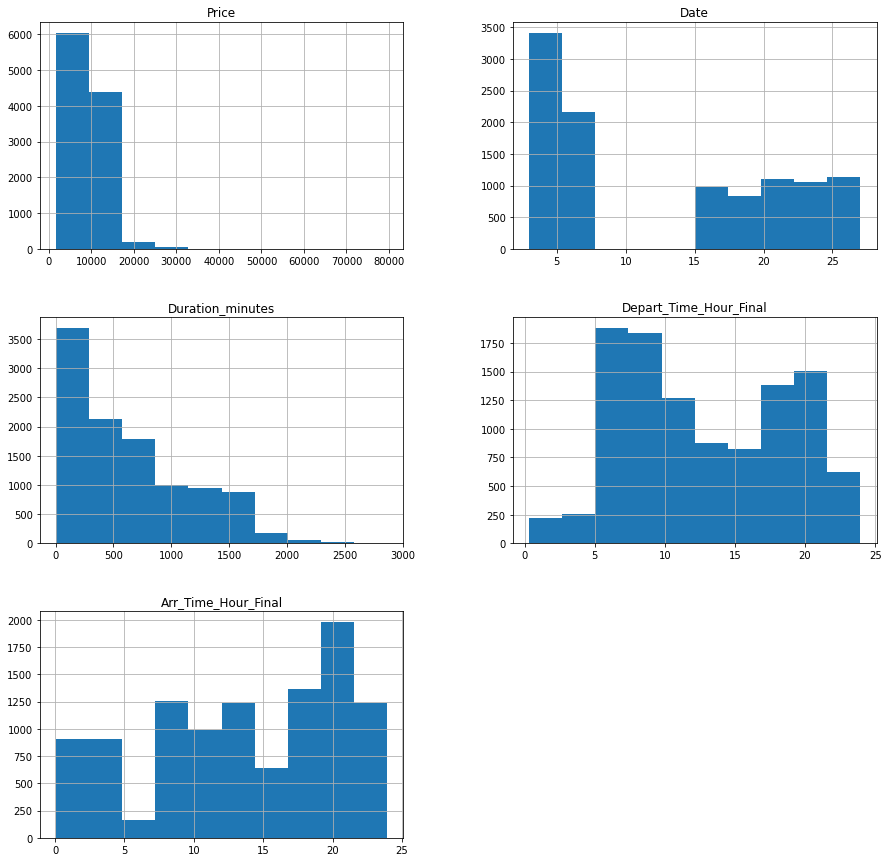

In [352]:
df.hist(figsize=(15,15))
plt.show()

In [353]:
##checking outliers

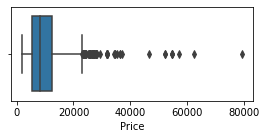

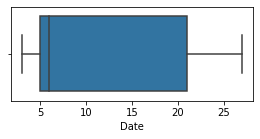

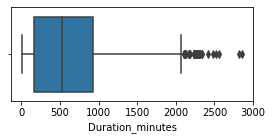

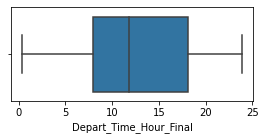

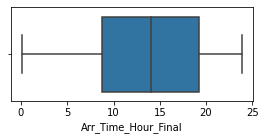

In [354]:
 for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df[i])

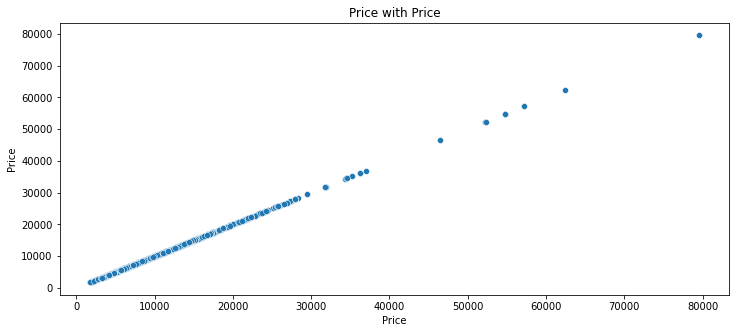

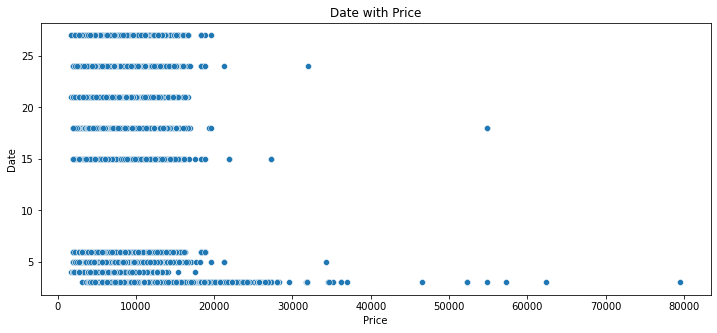

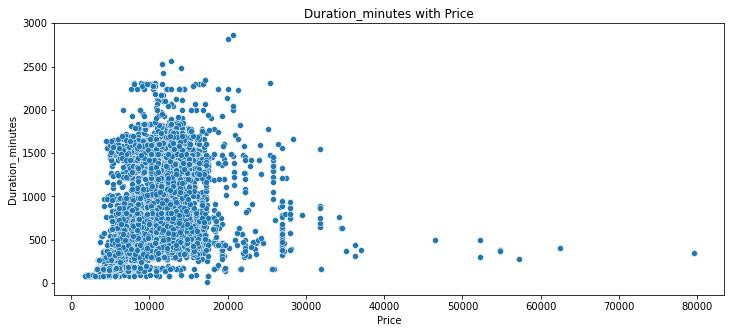

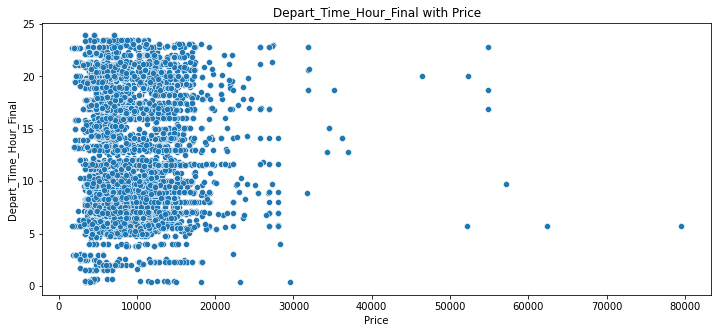

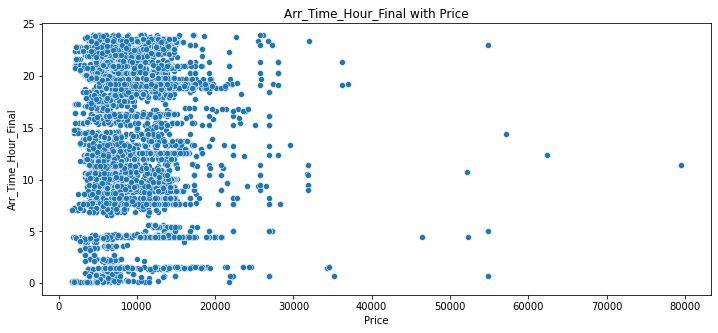

In [355]:
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Price')
        sns.scatterplot(x=df['Price'], y=df[i])
        plt.show()

In [356]:
##the features are not higly correlateed with price

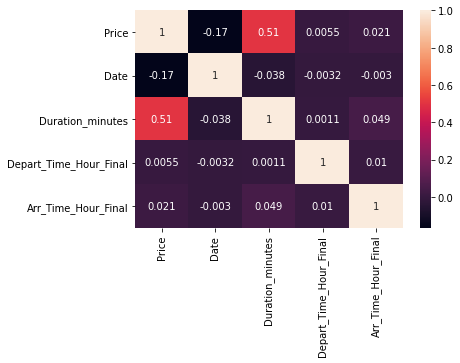

In [357]:
sns.heatmap(df.corr(),annot=True)

In [358]:
df.drop(['Source','Destination','Route'],axis=1,inplace=True)


In [360]:
#df_test.drop(['Source','Destination','Route'],axis=1,inplace=True)

In [209]:
df.dtypes

Airline                    object
Total_Stops                object
Additional_Info            object
Price                       int64
month                      object
day                        object
Date                        int64
is_weekend                 object
Duration_minutes            int64
Depart_Time_Hour_Final    float64
Arr_Time_Hour_Final       float64
dtype: object

In [215]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(df,col):
  df[col] = le.fit_transform(df[col])

In [217]:
encode(df,'Airline')
encode(df,'Total_Stops')
encode(df,'Additional_Info')
encode(df,'month')
encode(df,'day')

In [218]:
encode(df_test,'Airline')
encode(df_test,'Total_Stops')
encode(df_test,'Additional_Info')
encode(df_test,'month')
encode(df_test,'day')

In [229]:
df['is_weekend'] = df['is_weekend'].replace('Yes',1)
df['is_weekend'] = df['is_weekend'].replace('No',0)
df_test['is_weekend'] = df_test['is_weekend'].replace('Yes',1)
df_test['is_weekend'] = df_test['is_weekend'].replace('No',0)

In [225]:
df.drop('Additional_Info',axis=1,inplace=True)
df_test.drop('Additional_Info',axis=1,inplace=True)

KeyError: ignored

In [227]:
##removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
print("The shape of dataset before removing the outliers is", df.shape)
df2=df[(z<3).all(axis=1)]
print("The shape of dataset after removing the outliers is", df2.shape)

The shape of dataset before removing the outliers is (10682, 10)
The shape of dataset after removing the outliers is (10616, 10)


In [230]:
from scipy.stats import zscore
z=np.abs(zscore(df_test))
print("The shape of dataset before removing the outliers is", df_test.shape)
df2_test=df_test[(z<3).all(axis=1)]
print("The shape of dataset after removing the outliers is", df2_test.shape)

The shape of dataset before removing the outliers is (2671, 9)
The shape of dataset after removing the outliers is (2653, 9)


In [233]:
##significant outliers are present..aand they are removed

In [256]:
x=df2.drop(['Price'],axis=1)
y=pd.DataFrame(df2['Price'])
x.shape ,y.shape

((10616, 9), (10616, 1))

Airline
0.7286592518384646




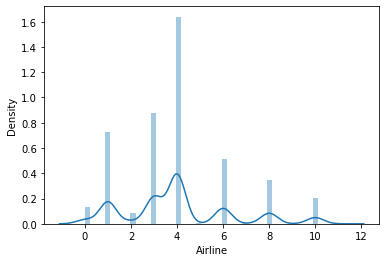

Total_Stops
0.6272528718089974




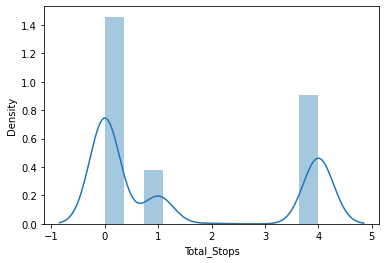

month
-0.3395099148492108




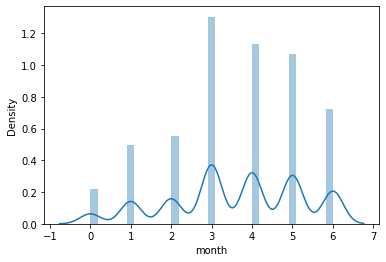

day
-0.06359596211713571




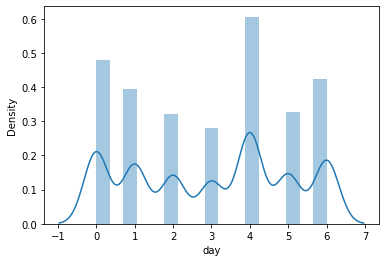

Date
0.13766330020386036




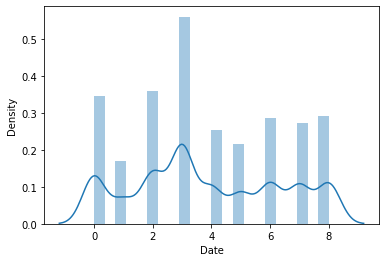

is_weekend
1.6724142553969434




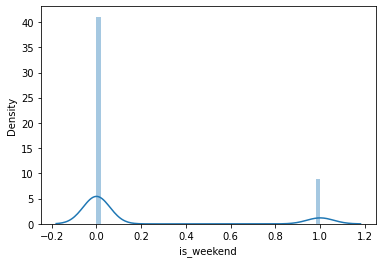

Duration_minutes
0.7744668320384046




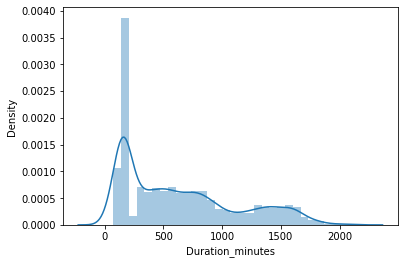

Depart_Time_Hour_Final
0.11608953082710015




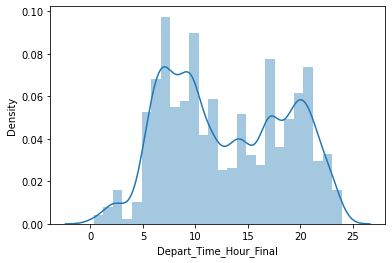

Arr_Time_Hour_Final
-0.3626943612884561




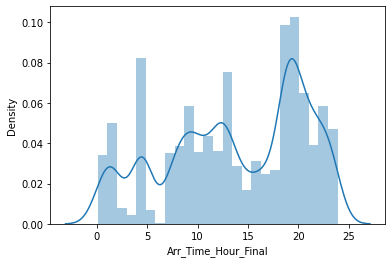

In [257]:
from scipy.stats import skew
for i in x.columns:
  print(i)
  print(skew(df2[i]))
  print('\n')
  plt.figure()
  sns.distplot(df2[i])
  plt.show()

In [258]:
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [259]:
x.skew()

Airline                  -0.483716
Total_Stops               0.401956
month                    -0.339558
day                      -0.063605
Date                      0.137683
is_weekend                1.672651
Duration_minutes          0.308886
Depart_Time_Hour_Final    0.116106
Arr_Time_Hour_Final      -0.362746
dtype: float64

In [260]:
##skewness has reduced

In [261]:
for i in df2_test.columns:
    if df2_test.skew()[i]>0.55:
        df2_test[i]=np.sqrt(df2_test[i])

In [262]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8
0,-0.234603,1.325339,0.252749,0.002890,1.250672,2.139757,-1.029797,1.635803,-1.840069
1,-1.356893,0.220613,-0.977787,-0.484038,-0.735377,2.139757,-0.209782,-1.238468,-0.069998
2,0.176184,0.220613,1.483284,-1.457893,-0.338167,-0.467343,1.079673,-0.613096,-1.363850
3,-0.234603,-0.884112,-1.593054,0.489817,-0.735377,-0.467343,-0.521973,0.895461,1.431926
4,-0.234603,-0.884112,-0.977787,0.489817,-1.529796,-0.467343,-0.638596,0.677713,1.150590


In [263]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2_test=pd.DataFrame(scaler.fit_transform(df2_test))
df2_test.head()

,0,1,2,3,4,5,6,7,8
0,0.004605,-0.867732,-0.355791,0.503718,-0.706193,NaN,0.254824,0.781617,-1.359699
1,-0.431683,-0.867732,-1.588858,0.503718,-0.823069,NaN,-0.786092,-1.187304,-0.516910
2,0.004605,-0.867732,0.877277,0.992154,1.046954,NaN,1.507527,1.090087,0.719466
3,0.877180,-0.867732,0.877277,0.992154,1.046954,NaN,0.495500,-0.892935,1.004674
4,-1.740546,1.350661,-0.355791,-0.961593,1.397583,NaN,-1.038929,1.913262,-1.597848


In [264]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state

In [265]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.5336966220765738 is achieved at r_state 79


79

In [266]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=79,test_size=0.20)

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [268]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [269]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [270]:
score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.5336966220765738

The cross validation score is 0.5099540076412321

The mean absolute error is  315.3934702535525

The root mean square error is 17.7593206585599


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

The r2 score is  0.6864168041413126

The cross validation score is 0.6824159293138177

The mean absolute error is  242.13719397363465

The root mean square error is 15.56075814263671


DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
             

In [271]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.533697,0.509954,315.393470,17.759321
1,KNeighborsRegressor,0.686417,0.682416,242.137194,15.560758
2,DecisionTreeRegressor,0.708135,0.719061,186.361935,13.651444
3,SVR,0.609870,0.593317,271.253907,16.469788


In [272]:
## decision tree is working best

In [273]:
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x,train_y)
gdls.best_params_

{'alpha': 0.1}

In [279]:
## regularization models

In [274]:
ls=Lasso(alpha=1)
max_r2_score(ls,x,y)

The maximum r2 score 0.5337291221724074 is achieved at r_state 79


79

In [275]:
cvscore=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.5099273801602285


In [276]:
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x,train_y)
grd.best_params_

{'alpha': 1}

In [277]:
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.53369586196626 is achieved at r_state 79


79

In [278]:
cvscore=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is 0.5099541334760993


In [280]:
## boosting models

In [281]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [282]:
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [283]:
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

The maximum r2 score 0.8363094139614824 is achieved at r_state 96


96

In [284]:
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.8212194187196393


In [285]:
## random forest is working good

In [286]:
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [287]:
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y)

The maximum r2 score 0.8545909308304117 is achieved at r_state 81


81

In [288]:
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.8388678502751


In [289]:
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [290]:
ad=AdaBoostRegressor(n_estimators=50,learning_rate=0.1)
max_r2_score(ad,x,y)

The maximum r2 score 0.7182720465841921 is achieved at r_state 81


81

In [291]:
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.6941493682806144


In [292]:
result_boosters=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.53,0.53,0.83,0.85,0.72],'Cross_val_score':[0.50,0.51,0.82,0.84,0.69]})
result_boosters

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.53,0.50
1,Ridge,0.53,0.51
2,RandomForestRegressor,0.83,0.82
3,GradientBoostRegressor,0.85,0.84
4,AdaBoostRegressor,0.72,0.69


In [293]:
## gradient booster is working best

In [294]:
import joblib
joblib.dump(gb,'FlightPrice.pkl')

['FlightPrice.pkl']

In [295]:
##making predictions on test data

In [361]:
#predict=gb.predict(df2_test)
#pd.DataFrame(predict).to_csv("predictions.csv")